In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, Flatten, Dense, Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras.models import Model, Sequential
# from tensorflow.keras.saving import load_model
from tensorflow.keras.optimizers import SGD, RMSprop
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import average_precision_score
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!nvidia-smi
tf.device('/device:GPU:0')
print(tf.config.list_physical_devices())



2024-05-26 00:57:23.709866: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-26 00:57:25.241354: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


/bin/bash: /home/mayoi/anaconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Sun May 26 00:57:28 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.76.01              Driver Version: 552.22         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3070 ...    On  |   00000000:01:00.0 Off |                  N/A |
| N/A   54C    P8             12W /  106W |       0MiB /   8192MiB |      0%      Default |
|                      

2024-05-26 00:57:29.170072: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-26 00:57:29.560596: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-26 00:57:29.560670: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-26 00:57:29.563814: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-26 00:57:29.563888: I tensorflow/compile

In [11]:
!which python

/home/mayoi/anaconda3/envs/tf/bin/python


In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("GPU!!")
except:
    pass

In [16]:
tf.__version__

'2.12.1'

In [3]:
physical_devices

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:

import os
import random
import shutil

# Set the paths to your dataset folders
dataset_dir = "/train"
real_dir = os.path.join(dataset_dir, "REAL")
fake_dir = os.path.join(dataset_dir, "FAKE")

# Set the paths to the new directories that will contain the selected images
train_dir = "/train"
real_train_dir = os.path.join(train_dir, "REAL")
fake_train_dir = os.path.join(train_dir, "FAKE")

# Create the new directories if they don't exist
if not os.path.exists(real_train_dir):
    os.makedirs(real_train_dir)
if not os.path.exists(fake_train_dir):
    os.makedirs(fake_train_dir)

# Set the number of images to select from each folder
num_images = 10000

# Randomly select the required number of images from the REAL folder and copy them to the new directory
real_images = os.listdir(real_dir)
selected_real_images = random.sample(real_images, num_images)
for image_name in selected_real_images:
    source_path = os.path.join(real_dir, image_name)
    dest_path = os.path.join(real_train_dir, image_name)
    shutil.copyfile(source_path, dest_path)

# Randomly select the required number of images from the FAKE folder and copy them to the new directory
fake_images = os.listdir(fake_dir)
selected_fake_images = random.sample(fake_images, num_images)
for image_name in selected_fake_images:
    source_path = os.path.join(fake_dir, image_name)
    dest_path = os.path.join(fake_train_dir, image_name)
    shutil.copyfile(source_path, dest_path)
    
# Set the paths to your dataset folders
dataset_dir_test = "/test"
real_dir = os.path.join(dataset_dir_test, "REAL")
fake_dir = os.path.join(dataset_dir_test, "FAKE")
# Set the paths to the new directories that will contain the selected images
test_dir = "/test"
real_test_dir = os.path.join(test_dir, "REAL")
fake_test_dir = os.path.join(test_dir, "FAKE")

# Create the new directories if they don't exist
if not os.path.exists(real_test_dir):
    os.makedirs(real_test_dir)
if not os.path.exists(fake_test_dir):
    os.makedirs(fake_test_dir)

# Set the number of images to select from each folder
num_images = 1000

# Randomly select the required number of images from the REAL folder and copy them to the new directory
real_images = os.listdir(real_dir)
selected_real_images = random.sample(real_images, num_images)
for image_name in selected_real_images:
    source_path = os.path.join(real_dir, image_name)
    dest_path = os.path.join(real_test_dir, image_name)
    shutil.copyfile(source_path, dest_path)

# Randomly select the required number of images from the FAKE folder and copy them to the new directory
fake_images = os.listdir(fake_dir)
selected_fake_images = random.sample(fake_images, num_images)
for image_name in selected_fake_images:
    source_path = os.path.join(fake_dir, image_name)
    dest_path = os.path.join(fake_test_dir, image_name)
    shutil.copyfile(source_path, dest_path)

PermissionError: [Errno 13] Permission denied: '/train'

In [91]:
import os
print(os.listdir('train'))

['REAL', 'FAKE']


In [70]:
import cv2
import numpy as np

# def co_occurrence_matrix(image, direction=(5, 5), levels=256, resize_dim=(128, 128)):
#     # image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#     if resize_dim is not None:
#         image = cv2.resize(image,(32,32))
#         image = cv2.resize(image, resize_dim)

#     height, width = image.shape
#     co_occurrence = np.zeros((levels, levels), dtype=np.uint32)

#     dx, dy = direction
#     for y in range(height):
#         for x in range(width):
#             if 0 <= y + dy < height and 0 <= x + dx < width:
#                 co_occurrence[image[y, x], image[y + dy, x + dx]] += 255

#     return co_occurrence

def co_occurrence_matrix_color(image, direction=(20, 20), levels=256, resize_dim=(128, 128)):
    
    if resize_dim is not None:
            image = cv2.resize(image,(32,32))
            image = cv2.resize(image, resize_dim)

    # image = np.uint8(image)
    # Split into color channels
    blue, green, red = cv2.split(image)

    def calculate_co_occurrence(channel):
        height, width = channel.shape
        # Ensure channel data is suitable for indexing
        channel = channel.astype(np.int32)
        co_occurrence = np.zeros((levels, levels), dtype=np.uint32)
        dx, dy = direction
        for y in range(height):
            for x in range(width):
                # Check bounds and ensure indexing with integers
                if 0 <= y + dy < height and 0 <= x + dx < width:
                    val1 = int(channel[y, x])  # Convert to integer if necessary
                    val2 = int(channel[y + dy, x + dx])  # Convert to integer
                    co_occurrence[val1, val2] += 1
        return co_occurrence
    
    co_red = calculate_co_occurrence(red)
    co_green = calculate_co_occurrence(green)
    co_blue = calculate_co_occurrence(blue)

    # Convert co-occurrence matrices to float32 for normalization
    co_red = co_red.astype(np.float32)
    co_green = co_green.astype(np.float32)
    co_blue = co_blue.astype(np.float32)

    # Normalize each matrix
    co_red_normalized = cv2.normalize(co_red, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    co_green_normalized = cv2.normalize(co_green, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    co_blue_normalized = cv2.normalize(co_blue, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

    # Stack the normalized matrices into a 3-channel image
    co_occurrence_image = np.stack((co_red_normalized, co_green_normalized, co_blue_normalized), axis=-1)

    return co_occurrence_image

In [3]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True,
    validation_split=0.2,
)

In [72]:

train_img = train_datagen.flow_from_directory('./train' ,class_mode='binary'
, batch_size=32 , subset="training",target_size=(256, 256) ,shuffle=True)

valid_img = train_datagen.flow_from_directory('./train' ,class_mode='binary'
, batch_size=32 ,subset="validation", target_size=(256, 256),shuffle=True)

Found 80000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(  validation_split=0.2,rescale=1./255,  )
train_img = train_datagen.flow_from_directory('./train3' ,class_mode='binary'
, batch_size=32 , subset="training",target_size=(224, 224) ,shuffle=True, keep_aspect_ratio=True)

valid_img = train_datagen.flow_from_directory('./train3' ,class_mode='binary'
, batch_size=32 ,subset="validation", target_size=(224, 224),shuffle=True, keep_aspect_ratio=True)

Found 80000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [5]:
print(train_img.class_indices)
print(valid_img.class_indices)

{'FAKE': 0, 'REAL': 1}
{'FAKE': 0, 'REAL': 1}


In [6]:
key = list(train_img.class_indices.keys())

In [ ]:
# Fetch a batch of images and labels from 'train_img'
images, labels = next(train_img)

# Plot 5 images
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])  # Convert the images to uint8 type for display
    plt.title(f'Label{i}: {key[int(labels[i])]}')
    plt.axis('off')
plt.show()


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Open the original image
im = Image.open("./train/FAKE/1000 (10).jpg")

# Define the new size
new_size = (128, 128)

# Resize the image
im_resized = im.resize(new_size)

# Plot the original and resized images
plt.figure(figsize=(10, 5))

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.title('Original Image')
plt.axis('off')

# Plot the resized image
plt.subplot(1, 2, 2)
plt.imshow(im_resized)
plt.title('Resized Image (224x224)')
plt.axis('off')

plt.show()

In [9]:
# VGG16_96_Fulldat
from tensorflow.keras.optimizers import Adam
baseModel = tf.keras.applications.VGG16(weights="imagenet", include_top=False,
                                        input_tensor=Input(shape=(122, 122, 3)))
headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)

headModel = Dense(1, activation="sigmoid")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [3]:
# VGG16_96_Fulldat_metric_bc
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
baseModel = tf.keras.applications.VGG16(weights="imagenet", include_top=False,
                                        input_tensor=Input(shape=(32, 32, 3)))
headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dense(256, activation="relu")(headModel)

headModel = Dense(1, activation="sigmoid")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=keras.metrics.BinaryAccuracy())

In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
cnn_model = Sequential()

#normal CNN
cnn_model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(256,256, 3)))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(256, (3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dropout(0,2))
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(0,2))
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=keras.metrics.BinaryAccuracy())
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 batch_normalization_4 (Batc  (None, 254, 254, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 batch_normalization_5 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [ ]:
import keras.applications 

In [9]:
from tensorflow.keras.optimizers import AdamW
baseModel = tf.keras.applications.ResNet50(weights="imagenet", include_top=False,input_tensor=Input(shape=(122, 122, 3)))

# baseModel = tf.keras.applications.VGG16(weights="imagenet", include_top=False,
#                                         input_tensor=Input(shape=(122, 122, 3)))

headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)

headModel = Dense(1, activation="sigmoid")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)
model.compile(optimizer=AdamW(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
import keras
import keras.optimizers
# from keras.optimizers import AdamW

baseModel = tf.keras.applications.ResNet50(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

# baseModel = tf.keras.applications.VGG16(weights="imagenet", include_top=False,
#                                         input_tensor=Input(shape=(122, 122, 3)))

headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)

headModel = Dense(1, activation="sigmoid")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
from tensorflow.keras.optimizers import AdamW
baseModel = tf.keras.applications.InceptionV3(weights="imagenet", include_top=False,input_tensor=Input(shape=(122, 122, 3)))

# baseModel = tf.keras.applications.VGG16(weights="imagenet", include_top=False,
#                                         input_tensor=Input(shape=(122, 122, 3)))

headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)

headModel = Dense(1, activation="sigmoid")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)
model.compile(optimizer=AdamW(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

87910968/87910968 [==============================] - 5s 0us/step


In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [23]:

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)
history = cnn_model.fit(train_img, epochs=20, steps_per_epoch=204 , validation_data=valid_img, callbacks=[callback],verbose=True)

NameError: name 'cnn_model' is not defined

In [10]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',restore_best_weights=True)
history = model.fit(train_img, epochs=10, validation_data=valid_img, callbacks=[callback])

Epoch 1/10


2024-05-21 03:44:19.417384: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-05-21 03:44:31.091588: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8902
2024-05-21 03:44:32.877395: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-05-21 03:44:32.924136: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f90d4a4e2c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-21 03:44:32.924195: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti Laptop GPU, Compute Capability 8.6
2024-05-21 

 478/2500 [====>.........................] - ETA: 9:02 - loss: 0.1034 - accuracy: 0.9661

/home/mayoi/anaconda3/envs/tf/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:870: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


 866/2500 [=========>....................] - ETA: 7:13 - loss: 0.0823 - accuracy: 0.9729

/home/mayoi/anaconda3/envs/tf/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:870: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


2500/2500 [==============================] - ETA: 0s - loss: 0.0636 - accuracy: 0.9797

2024-05-21 03:55:43.153635: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-05-21 03:58:32.487733: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 205520896 exceeds 10% of free system memory.
2024-05-21 03:58:33.371126: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 205520896 exceeds 10% of free system memory.


2500/2500 [==============================] - 855s 329ms/step - loss: 0.0636 - accuracy: 0.9797 - val_loss: 0.0250 - val_accuracy: 0.9911
Epoch 2/10
2500/2500 [==============================] - 818s 327ms/step - loss: 0.0395 - accuracy: 0.9888 - val_loss: 0.0283 - val_accuracy: 0.9908


2024-05-21 04:12:11.496708: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 205520896 exceeds 10% of free system memory.


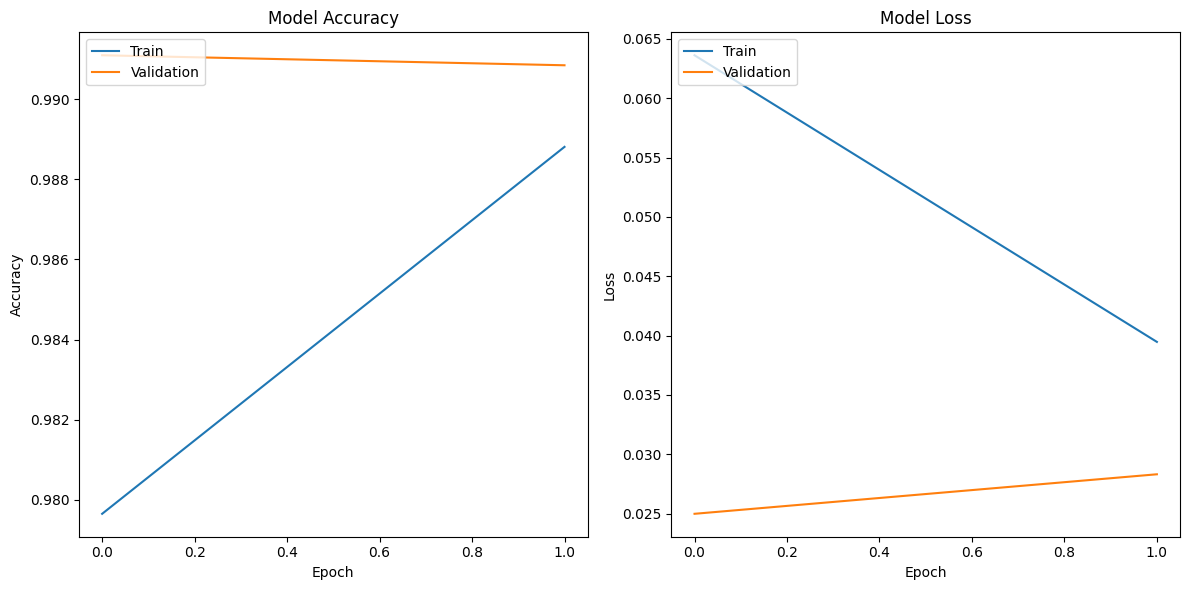

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('./test3', target_size=(122,122),
                                                  batch_size=32, class_mode='binary', shuffle=False)

Found 49996 images belonging to 2 classes.


In [ ]:
scores = model.evaluate(test_generator)

print('Baseline error: %.2f' % (1-scores[1]))
print("Accuracy = %.2f" %scores[1])


2024-05-20 02:21:49.535708: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


782/782 [==============================] - 376s 481ms/step - loss: 0.0842 - accuracy: 0.9753
Baseline error: 0.02
Accuracy = 0.98


In [18]:
model = cnn_model

In [13]:
predict_prob = model.predict(test_generator)
labels = [0 if pred < 0.5 else 1 for pred in predict_prob]

# Calculate accuracy
accuracy = np.sum(np.array(test_generator.labels) == np.array(labels)) / len(labels)

# Print the accuracy
print("\nAccuracy:", accuracy)

cm = confusion_matrix(test_generator.labels, labels)
print("\nConfusion Matrix:")
print(cm)

# Compute the classification report
class_names = test_generator.class_indices.keys()
classification_rep = classification_report(test_generator.labels, labels, target_names=class_names, digits=4)
print("\nClassification Report:")
print(classification_rep)

# Calculate the average precision (mAP)
mAP = average_precision_score(test_generator.labels,  predict_prob)
print("\nMean Average Precision (mAP):", mAP)

2024-05-21 04:12:13.877069: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1563/1563 [==============================] - 398s 254ms/step

Accuracy: 0.97884

Confusion Matrix:
[[24464   536]
 [  522 24478]]

Classification Report:
              precision    recall  f1-score   support

        FAKE     0.9791    0.9786    0.9788     25000
        REAL     0.9786    0.9791    0.9788     25000

    accuracy                         0.9788     50000
   macro avg     0.9788    0.9788    0.9788     50000
weighted avg     0.9788    0.9788    0.9788     50000


Mean Average Precision (mAP): 0.9978554777075377


In [14]:
model_name = f'Restnet_224_Newdateset_Fulldat_metric_bacc'
model_path = f"./models/{model_name}/"
import os
os.makedirs(model_path)

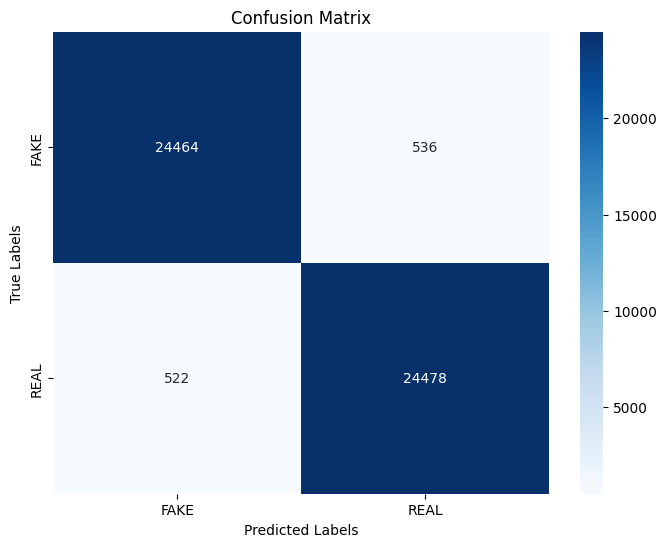

In [15]:
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(test_generator.labels, labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig(model_path+'confusion_matrix_Raw.png')
plt.show()

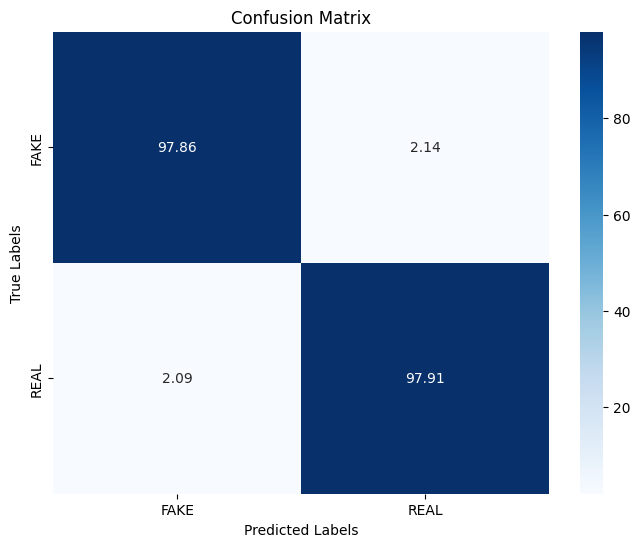

In [16]:
# Confusion matrix
cm = confusion_matrix(test_generator.labels, labels)
cm_percent = cm / cm.sum(axis=1).reshape(-1, 1) * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, cmap='Blues', fmt='.2f', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig(model_path+'confusion_matrix_Precent.png')
plt.show()


In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator2 = test_datagen.flow_from_directory('./test', target_size=(122,122),
                                                  batch_size=64, class_mode='binary', shuffle=False)

Found 20000 images belonging to 2 classes.


In [13]:
predict_prob = model.predict(test_generator2)
labels = [0 if pred < 0.5 else 1 for pred in predict_prob]

# Calculate accuracy
accuracy = np.sum(np.array(test_generator2.labels) == np.array(labels)) / len(labels)

# Print the accuracy
print("\nAccuracy:", accuracy)

cm = confusion_matrix(test_generator2.labels, labels)
print("\nConfusion Matrix:")
print(cm)

# Compute the classification report
class_names = test_generator2.class_indices.keys()
classification_rep = classification_report(test_generator2.labels, labels, target_names=class_names)
print("\nClassification Report:")
print(classification_rep)

# Calculate the average precision (mAP)
mAP = average_precision_score(test_generator2.labels,  predict_prob)
print("\nMean Average Precision (mAP):", mAP)

NameError: name 'model' is not defined

In [45]:
raw_image_data = tf.io.gfile.GFile('train2/FAKE/0a2af9210c76e8195d9e5da75207b37b.jpg', 'rb').read()
# to numpy array
image = tf.image.decode_jpeg(raw_image_data)
# to tensor
image = tf.convert_to_tensor(image)
#resize
image = tf.image.resize(image, [128,128])
print(image.shape)

(128, 128, 3)


In [39]:
raw_image_data = tf.io.gfile.GFile('real.jpg', 'rb').read()
# to numpy array
image = tf.image.decode_jpeg(raw_image_data)
# to tensor
image = tf.convert_to_tensor(image)
#resize
image = tf.image.resize(image, [32,32])
print(image.shape)

(32, 32, 3)


In [46]:
print(model.predict(np.asarray([image])))


1/1 [==============================] - 0s 23ms/step
[[0.]]


In [4]:

model.load_weights("models/VGG16_95_Fulldat_metric_bacc/VGG16_96_Fulldat_metric_bacc.h5")

In [26]:
model.save(f'./models/{model_name}/{model_name}.keras', overwrite=True)
model.save(f'./models/{model_name}/{model_name}.h5')

In [10]:
loaded_model = tf.keras.models.load_model('models/VGG16_Newdateset2_Fulldat_metric_bacc/VGG16_Newdateset2_Fulldat_metric_bacc.keras')


In [196]:
loaded_model.predict(x)

1/1 [==============================] - 0s 131ms/step


array([[0.42569298]], dtype=float32)

In [14]:

predict_prob = loaded_model.predict(test_generator)
%timeit
labels = [0 if pred < 0.5 else 1 for pred in predict_prob]

# Calculate accuracy
accuracy = np.sum(np.array(test_generator.labels) == np.array(labels)) / len(labels)

# Print the accuracy
print("\nAccuracy:", accuracy)

cm = confusion_matrix(test_generator.labels, labels)
print("\nConfusion Matrix:")
print(cm)

# Compute the classification report
class_names = test_generator.class_indices.keys()
classification_rep = classification_report(test_generator.labels, labels, target_names=class_names,digits=4)
print("\nClassification Report:")
print(classification_rep)

# Calculate the average precision (mAP)
mAP = average_precision_score(test_generator.labels,  predict_prob)
print("\nMean Average Precision (mAP):", mAP)

2024-05-26 01:01:24.699865: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


   1/1563 [..............................] - ETA: 23:58

2024-05-26 01:01:25.529169: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


 886/1563 [================>.............] - ETA: 2:41

/home/mayoi/anaconda3/envs/tf/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:870: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


1447/1563 [==========================>...] - ETA: 33s

/home/mayoi/anaconda3/envs/tf/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:870: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


1563/1563 [==============================] - 464s 297ms/step

Accuracy: 0.9698575886070886

Confusion Matrix:
[[24606   394]
 [ 1113 23883]]

Classification Report:
              precision    recall  f1-score   support

        FAKE     0.9567    0.9842    0.9703     25000
        REAL     0.9838    0.9555    0.9694     24996

    accuracy                         0.9699     49996
   macro avg     0.9702    0.9699    0.9699     49996
weighted avg     0.9702    0.9699    0.9699     49996


Mean Average Precision (mAP): 0.9963336121763409


In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image as Image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import matplotlib.pyplot as plt
import cv2


In [71]:
'./train2/REAL/827192.jpg'
'train2/FAKE/0a2af9210c76e8195d9e5da75207b37b.jpg'
"test3/FAKE/zyk6iolxfitb1.jpg"
"test3/REAL/827197.jpg"

'./train2/REAL/827192.jpg'

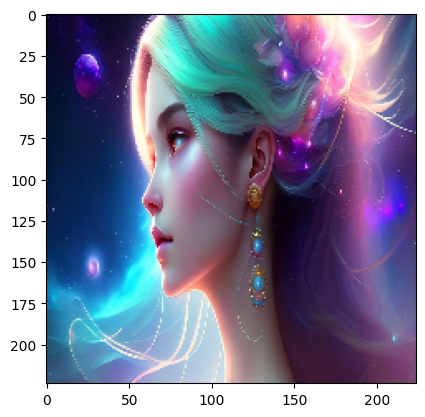

1/1 [==============================] - 0s 32ms/step
[[0.09499522]]


In [40]:
img_path = 'fake.jpg'
# img = Image.load_img(img_path, target_size=(122, 122))
# x = Image.img_to_array(img)
img = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
# img = img/255.0
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize the image to 122x122 pixels
resized_image = cv2.resize(image_rgb, (224, 224))

normalized_image = resized_image / 255.0

x = np.expand_dims(normalized_image, axis=0)
# x = preprocess_input(x)
plt.imshow(x[0])
plt.show()
print(model.predict(x))

In [33]:
x

array([[[[0.74901961, 0.62745098, 0.55686275],
         [0.73333333, 0.61960784, 0.54901961],
         [0.73333333, 0.61960784, 0.54901961],
         ...,
         [0.42352941, 0.41176471, 0.39607843],
         [0.44313725, 0.42745098, 0.41960784],
         [0.41568627, 0.4       , 0.40392157]],

        [[0.7254902 , 0.61176471, 0.54117647],
         [0.73333333, 0.62745098, 0.55294118],
         [0.74117647, 0.63529412, 0.56078431],
         ...,
         [0.44705882, 0.42352941, 0.42352941],
         [0.47058824, 0.44705882, 0.44705882],
         [0.40392157, 0.38039216, 0.38039216]],

        [[0.72156863, 0.61176471, 0.54117647],
         [0.7254902 , 0.62352941, 0.54901961],
         [0.7254902 , 0.62745098, 0.54901961],
         ...,
         [0.43921569, 0.41176471, 0.39215686],
         [0.43921569, 0.40784314, 0.39607843],
         [0.44313725, 0.41176471, 0.40392157]],

        ...,

        [[0.74117647, 0.75686275, 0.77254902],
         [0.8       , 0.81960784, 0.83137255]

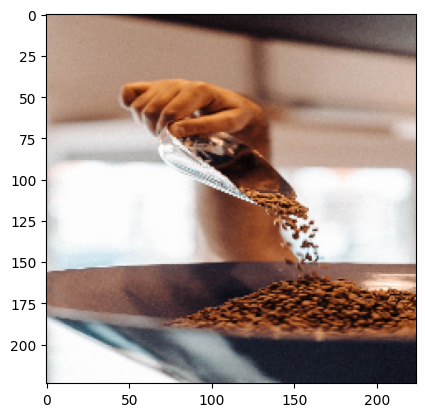

1/1 [==============================] - 0s 86ms/step
[[0.0015821]]


In [41]:
print("REAL" if model.predict(x)[0]  > 0.5  else "FAKE")

1/1 [==============================] - 0s 21ms/step
FAKE


In [42]:
def get_grad_cam(model, image, class_idx, layer_name='conv5_block3_out'):
    # Get the model's output and the chosen convolutional layer's output
    grad_model = Model(inputs=[model.inputs], outputs=[model.get_layer(layer_name).output, model.output])

    # Record operations for automatic differentiation
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image)
        loss = predictions[:, class_idx]
   
    # Get gradients of the loss w.r.t the outputs of the selected layer
    grads = tape.gradient(loss, conv_outputs)

    # Pool the gradients over all the axes leaving out the channel dimension
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Weigh the output feature map with the computed gradient weights
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    # Apply a ReLU activation to the heatmap and normalize it
    heatmap = tf.maximum(heatmap, 0)
    heatmap /= tf.math.reduce_max(heatmap)
    heatmap = heatmap.numpy()

    return heatmap

# Assuming the model predicts the image belongs to class 0
heatmap = get_grad_cam(model, x, class_idx=0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


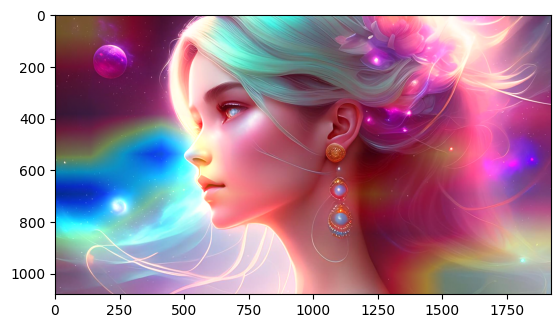

1/1 [==============================] - 0s 22ms/step
[[0.09499522]]


In [43]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = cv2.resize(img, (256, 256))

heatmap = np.uint8(255 * heatmap)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap to match image dimensions

# Use jet colormap to colorize heatmap
jet = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# Superimpose the heatmap on the original image
superimposed_img = jet * 0.4 + img

# Convert the result to the range [0, 1] for display
superimposed_img = superimposed_img / 255.0

# Display the image
plt.imshow(superimposed_img)
plt.show()
print(model.predict(x))

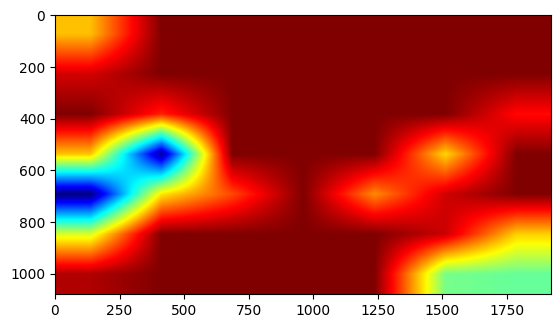

In [44]:
plt.imshow(jet)
plt.show()